# What are the most important internal and external features in predicting rental prices? 

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from numpy import log
import numpy as np

df = pd.read_csv('../data/curated/engineered-data.csv')

In [113]:
selected_property_types = ['Townhouse', 'House', 'Apartment', 'Unit']

In [114]:
df.head(20)

,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,log_closest_park_distance,log_closest_tram_distance,log_closest_train_distance,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,is_bus_walkable,city
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,7.251841,6.533934,6.820126,$<$1.5 km,$<$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,$<$200 m,True
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,7.831419,5.428029,7.311753,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,200m-1km,True
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,7.256297,5.473111,6.865683,$<$1.5 km,$<$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,200m-1km,True
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,7.697757,6.197869,7.401475,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,1.5-5km,200m-1km,True
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,7.831419,5.428029,7.311753,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,200m-1km,True
5,Melbourne,3000,650,Apartment,2,2,1,0,N,1778.6,...,7.865764,5.754476,6.996864,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,200m-1km,True
6,Melbourne,3000,465,Apartment,1,1,0,0,Y,1846.4,...,7.673921,6.068657,7.342520,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,1.5-5km,200m-1km,True
7,Melbourne,3000,500,Apartment,1,1,0,0,N,1430.8,...,7.054363,6.388729,6.313729,$<$1.5 km,$<$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,200m-1km,True
8,Melbourne,3000,590,Apartment,2,1,0,0,Y,1729.2,...,7.793793,6.619540,6.044768,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,$<$200 m,True
9,Melbourne,3000,360,Apartment,2,1,0,0,Y,2144.8,...,7.597145,5.736895,6.252097,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,$<$200 m,True


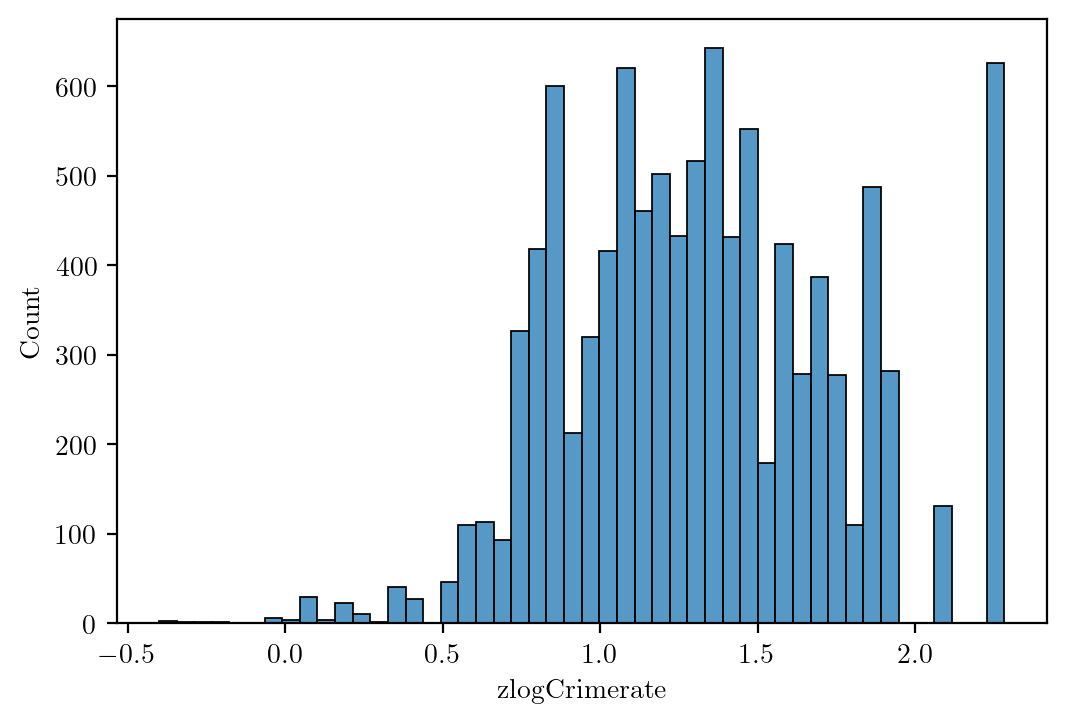

In [115]:
sns.histplot(data=df, x='zlogCrimerate', log_scale=False)
plt.savefig('../plots/crime-rate.png')

In [116]:
df.corr()

,postcode,price,studies,closest_primary_distance,closest_secondary_distance,closest_train_distance,closest_tram_distance,cbd_distance,cbd_duration,zlogCrimerate,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea,log_closest_park_distance,log_closest_tram_distance,log_closest_train_distance,city
postcode,1.000000,0.048909,-0.004804,-0.005807,0.012858,0.040030,0.066467,0.315770,0.374757,-0.291318,0.012984,0.024591,0.001499,-0.041165,0.035810,0.113934,0.054153,-0.332996
price,0.048909,1.000000,0.135581,-0.033372,-0.058048,-0.098448,-0.204043,-0.200638,-0.188507,-0.107526,0.011414,-0.186788,0.281954,0.275127,-0.184970,-0.191230,-0.104201,0.103786
studies,-0.004804,0.135581,1.000000,0.022078,0.008500,0.036678,0.006869,-0.006838,-0.003214,-0.010876,0.010926,0.000655,0.020482,0.037709,-0.005237,-0.008462,0.026703,0.029098
closest_primary_distance,-0.005807,-0.033372,0.022078,1.000000,0.384022,0.396756,0.222638,0.156924,0.119696,0.093938,0.328834,0.084104,-0.048053,0.027712,0.057017,0.141688,0.232329,0.053615
closest_secondary_distance,0.012858,-0.058048,0.008500,0.384022,1.000000,0.495901,0.307681,0.280360,0.269679,-0.040220,0.249897,0.127800,-0.105171,-0.121468,0.082132,0.269322,0.301396,-0.040882
closest_train_distance,0.040030,-0.098448,0.036678,0.396756,0.495901,1.000000,0.547493,0.499279,0.461736,-0.024929,0.325975,0.220366,-0.289244,-0.240022,0.151859,0.450849,0.796738,-0.186836
closest_tram_distance,0.066467,-0.204043,0.006869,0.222638,0.307681,0.547493,1.000000,0.866839,0.785640,0.163939,0.158438,0.257890,-0.559700,-0.530349,0.194786,0.791215,0.456234,-0.230210
cbd_distance,0.315770,-0.200638,-0.006838,0.156924,0.280360,0.499279,0.866839,1.000000,0.956171,-0.053811,0.080170,0.371869,-0.525690,-0.550677,0.338532,0.804544,0.469959,-0.426700
cbd_duration,0.374757,-0.188507,-0.003214,0.119696,0.269679,0.461736,0.785640,0.956171,1.000000,-0.162171,0.045788,0.409217,-0.513029,-0.571863,0.382168,0.800364,0.463289,-0.531579
zlogCrimerate,-0.291318,-0.107526,-0.010876,0.093938,-0.040220,-0.024929,0.163939,-0.053811,-0.162171,1.000000,0.051207,-0.109898,-0.199526,-0.026444,-0.147881,-0.004313,-0.084455,0.420403


<AxesSubplot:xlabel='closest_primary_distance', ylabel='Count'>

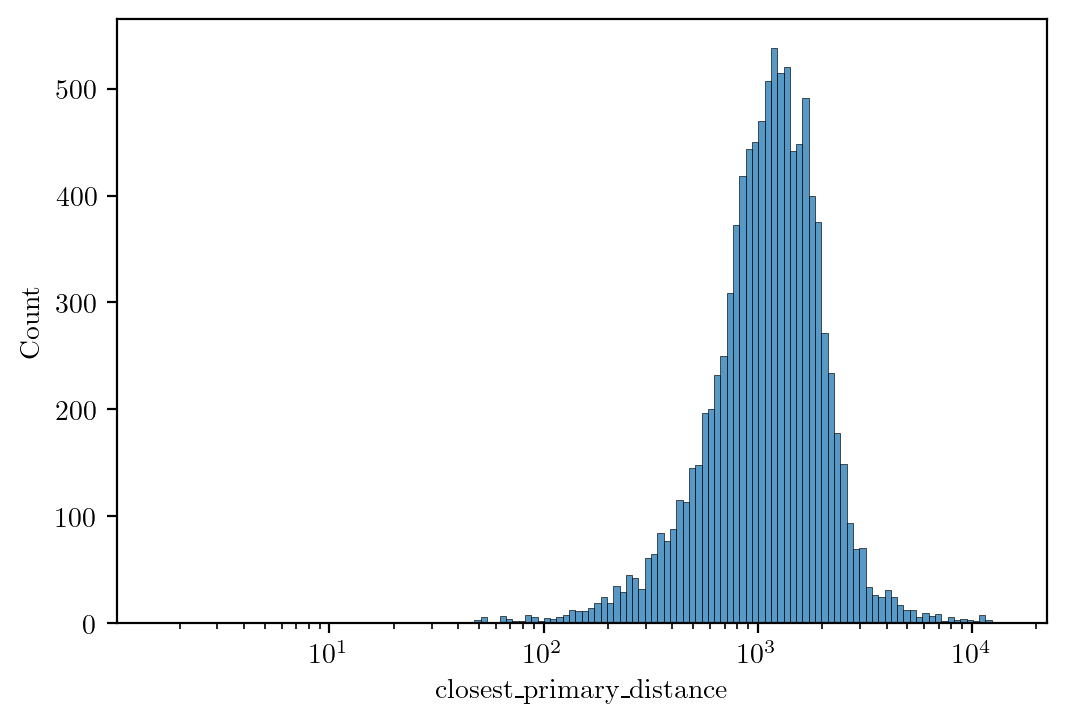

In [117]:
sns.histplot(df, x='closest_primary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_park_distance', ylabel='Count'>

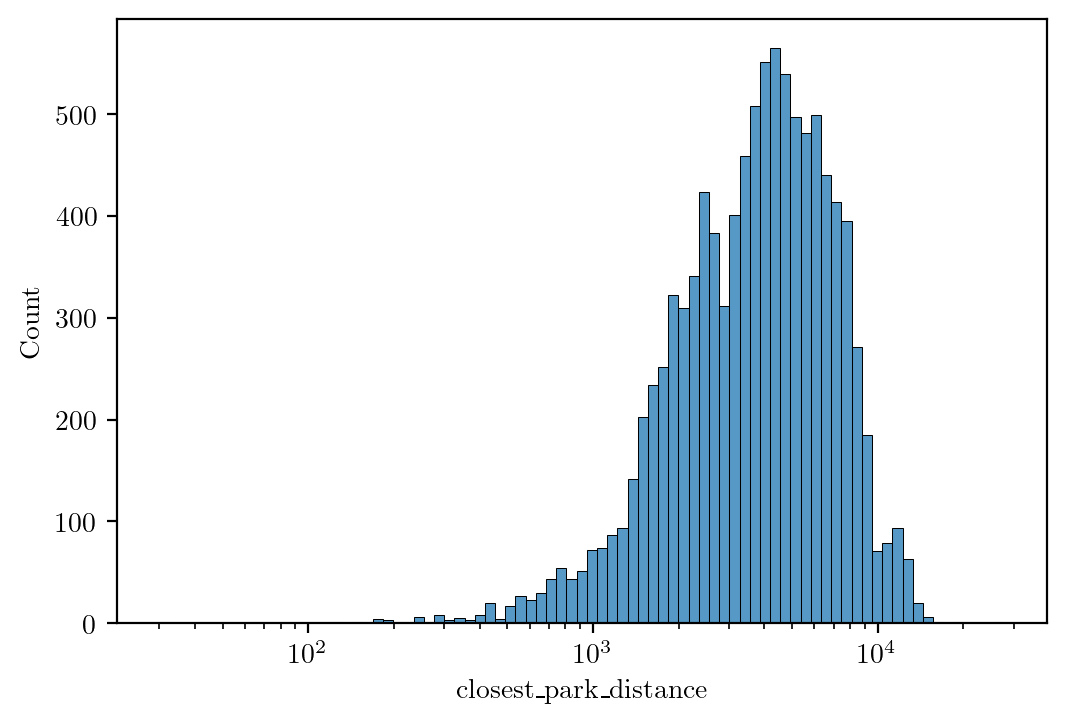

In [118]:
sns.histplot(df, x='closest_park_distance', log_scale=True)

<AxesSubplot:xlabel='closest_secondary_distance', ylabel='Count'>

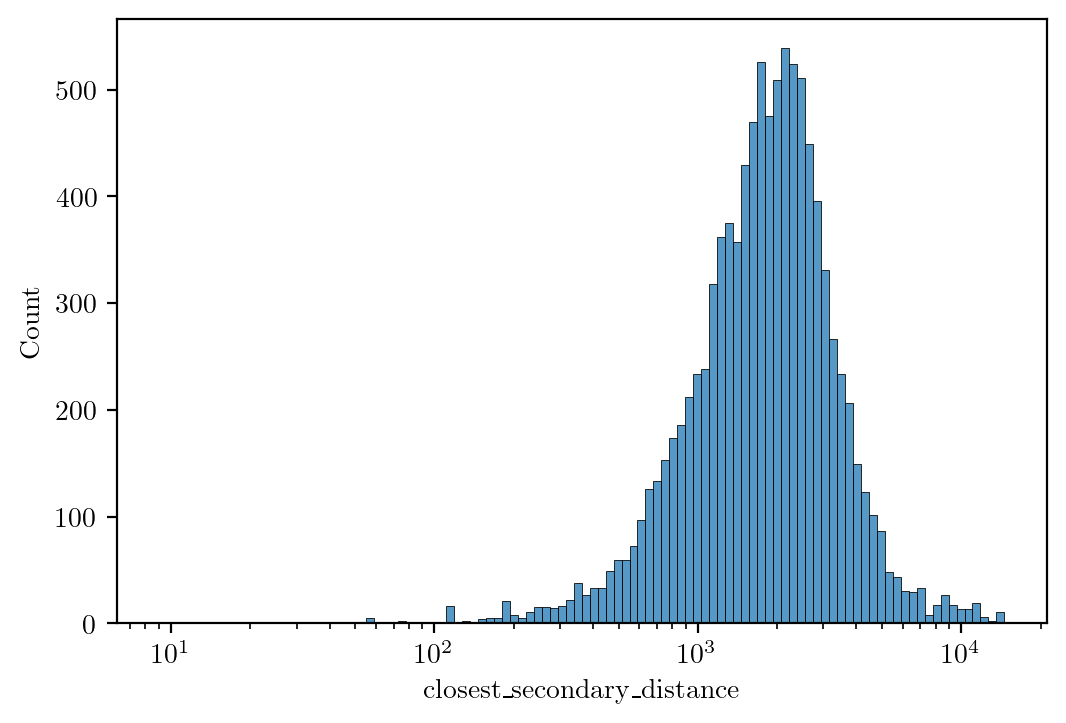

In [119]:
sns.histplot(df, x='closest_secondary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_tram_distance', ylabel='Count'>

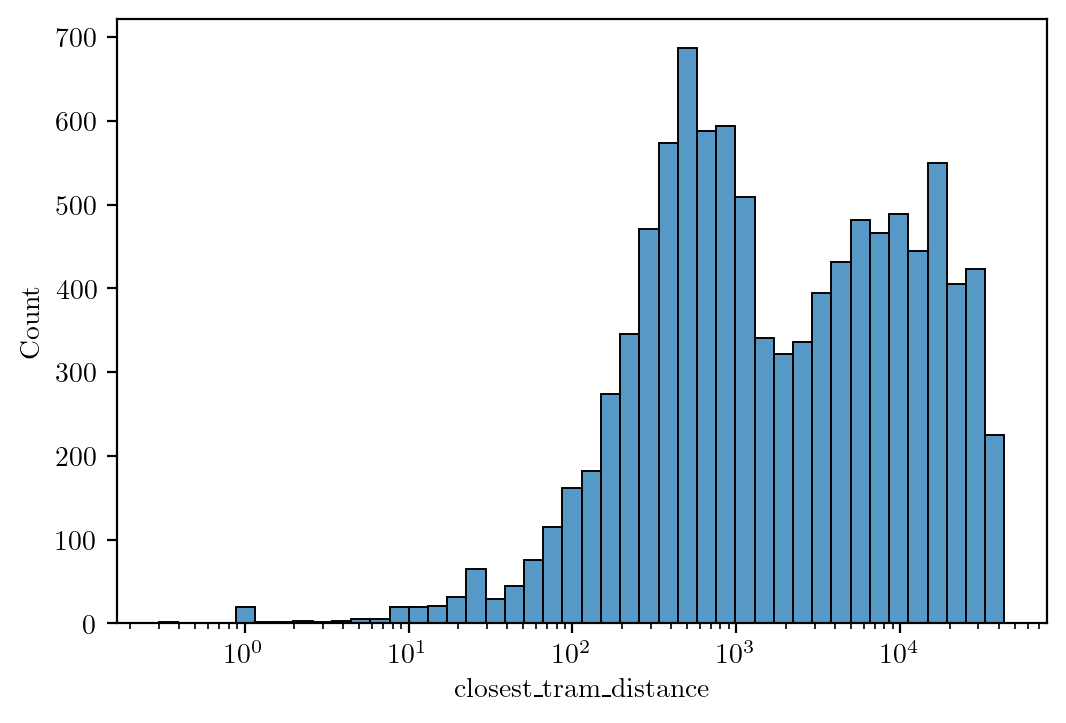

In [120]:
sns.histplot(df, x='closest_tram_distance', log_scale=True)

In [121]:
df = df[df['closest_bus_distance'] > 0]

<AxesSubplot:xlabel='closest_bus_distance', ylabel='Count'>

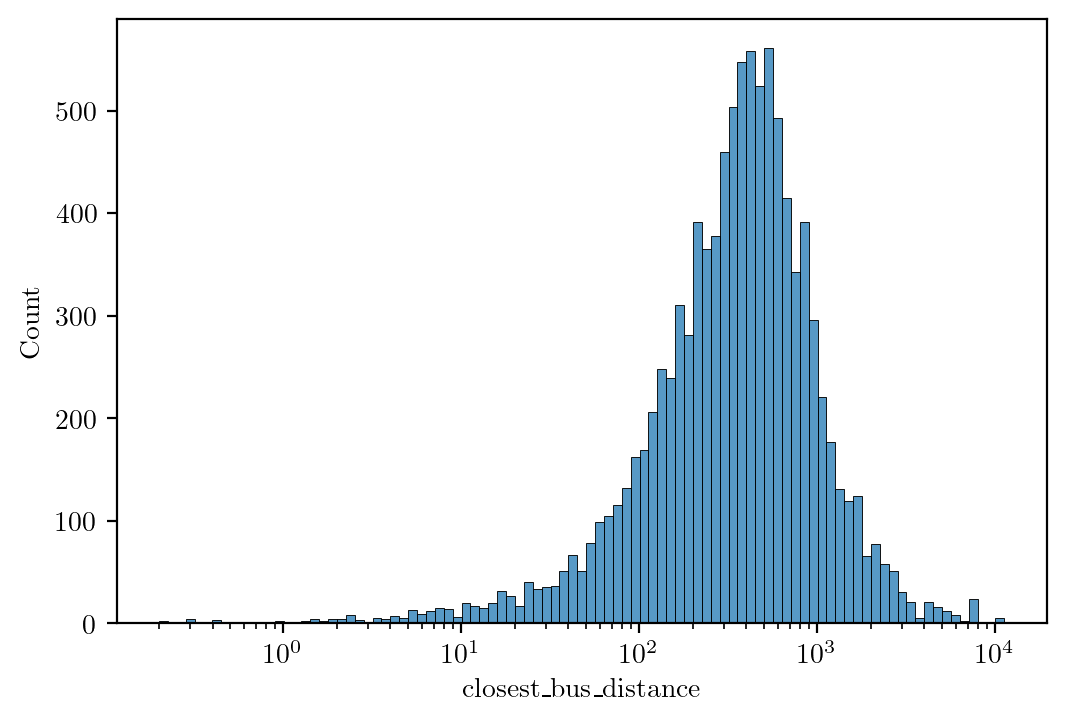

In [122]:
sns.histplot(df, x='closest_bus_distance', log_scale=True)

In [123]:
rcParams['figure.dpi'] = 200

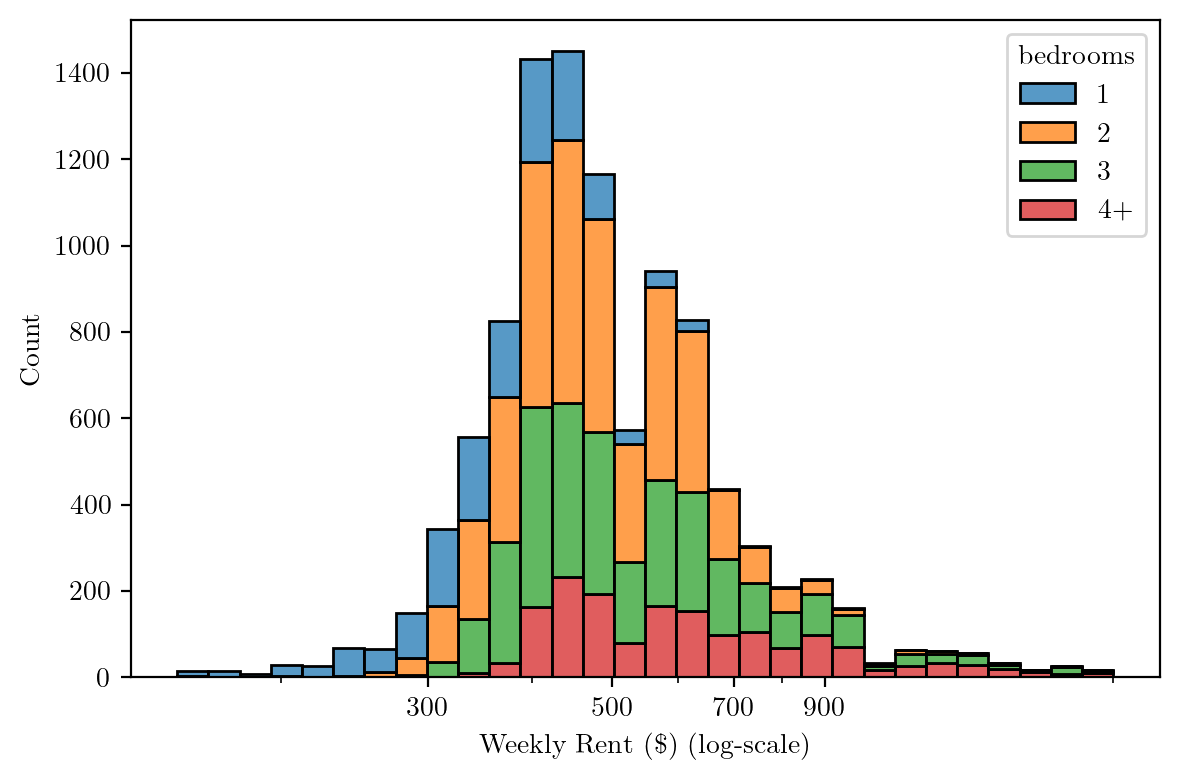

In [124]:
sns.histplot(df, x='price', hue='bedrooms', log_scale=True, multiple='stack', hue_order=['1', '2', '3', '4+'], bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bedrooms.png')

* More bedrooms -> more rent

Text(0.5, 0, 'Weekly Rent (\\$)')

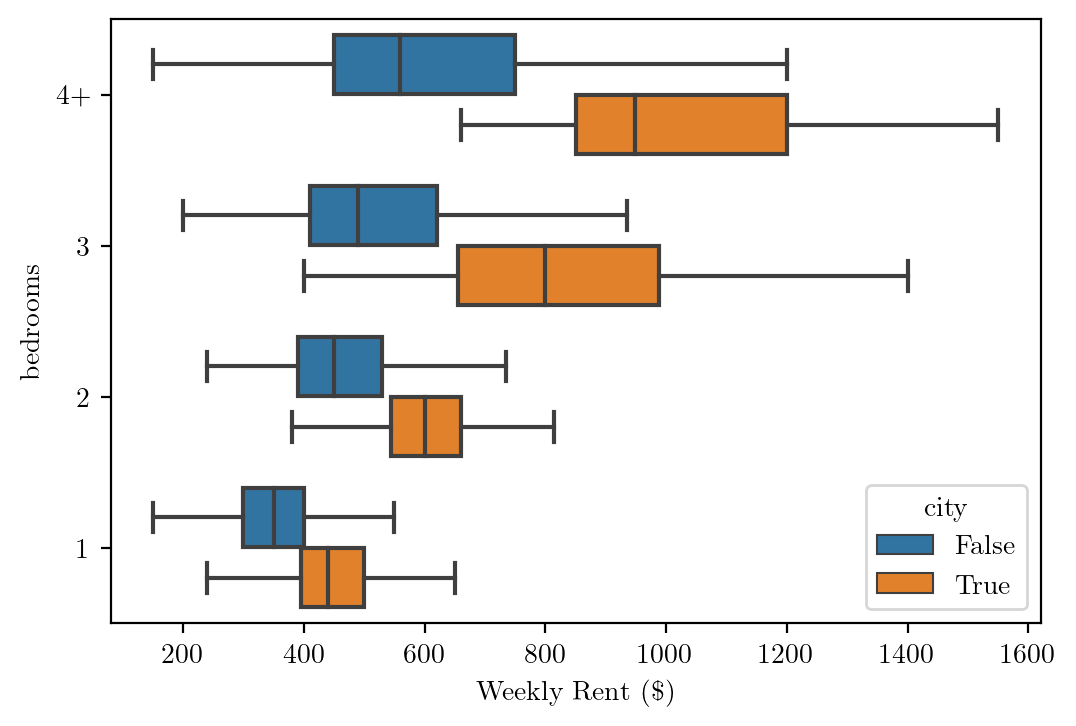

In [125]:
sns.boxplot(data=df, x='price', y='bedrooms', showfliers=False, hue='city', order=['1', '2', '3', '4+'][::-1])
plt.xlabel(r'Weekly Rent (\$)')

* Being in the city increases the effect of having more bedrooms on property rents

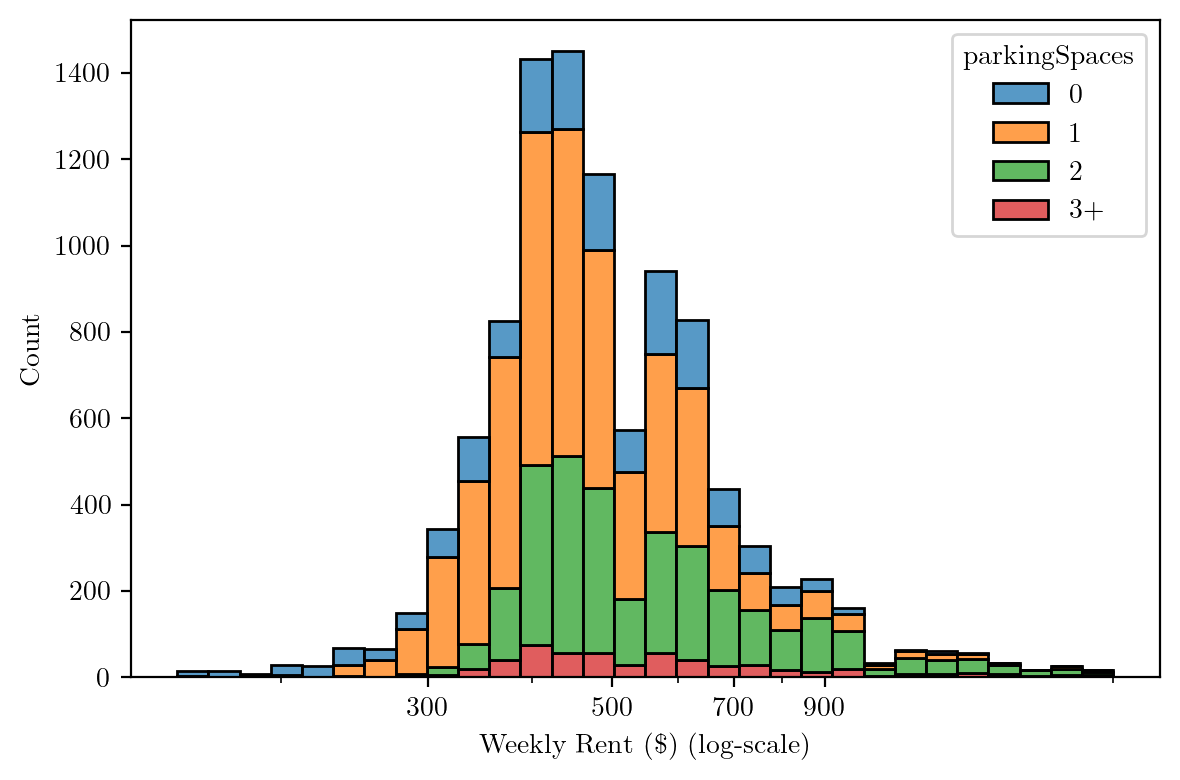

In [126]:
sns.histplot(df, x='price', hue='parkingSpaces', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-parking.png')

* Properties less than $300 almost never have more than 1 parking space
* It is rare for a property to have more than 2 parking spaces, when it does, it doesn't seem to impact the rent

Text(0.5, 0, 'Weekly Rent (\\$)')

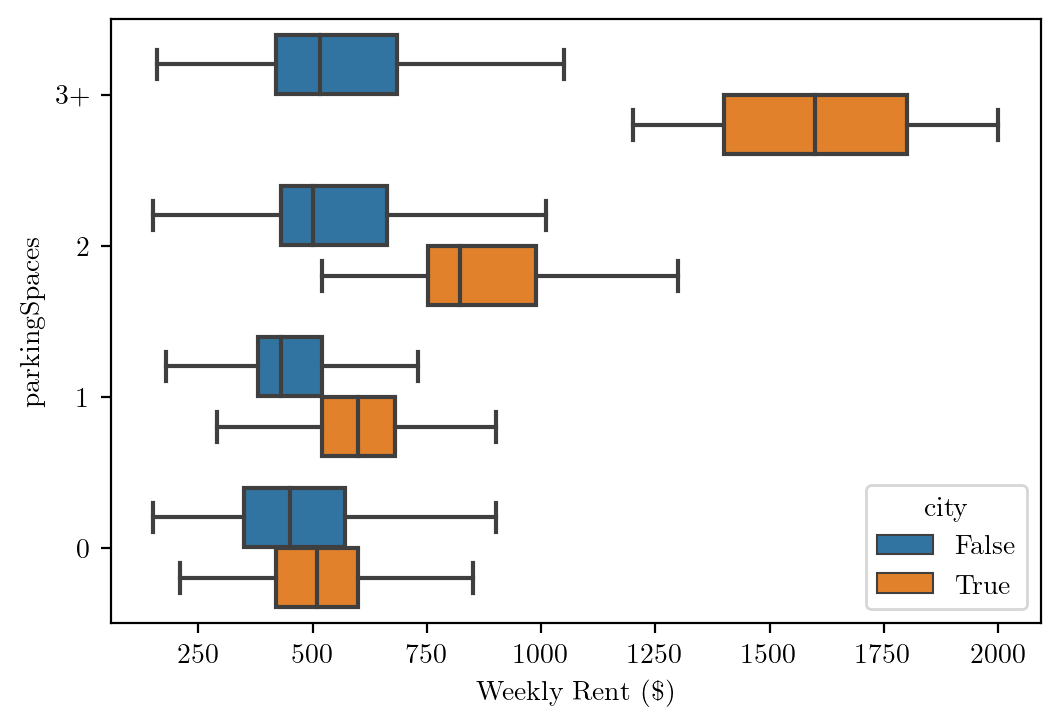

In [127]:
sns.boxplot(data=df, x='price', y='parkingSpaces', showfliers=False, hue='city', order=['0', '1', '2', '3+'][::-1])
plt.xlabel(r'Weekly Rent (\$)')

* City parking spaces are worth more than subruban ones

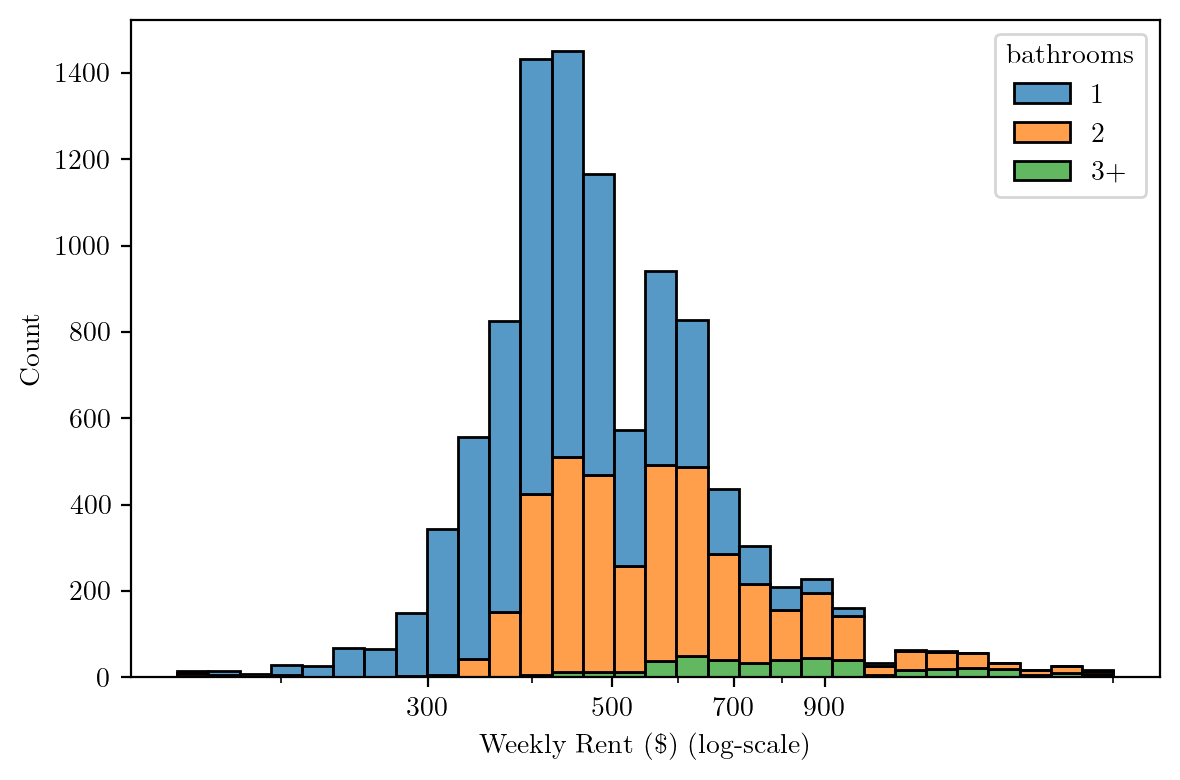

In [128]:
sns.histplot(df, x='price', hue='bathrooms', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bathrooms.png')

* Affordable properties almost never have more than 1 bathroom.
* Few properties have more than 2 bathrooms, those which do attract a premium.

* Townhouses attract a premium
* Units are more affordable

<AxesSubplot:xlabel='price', ylabel='Count'>

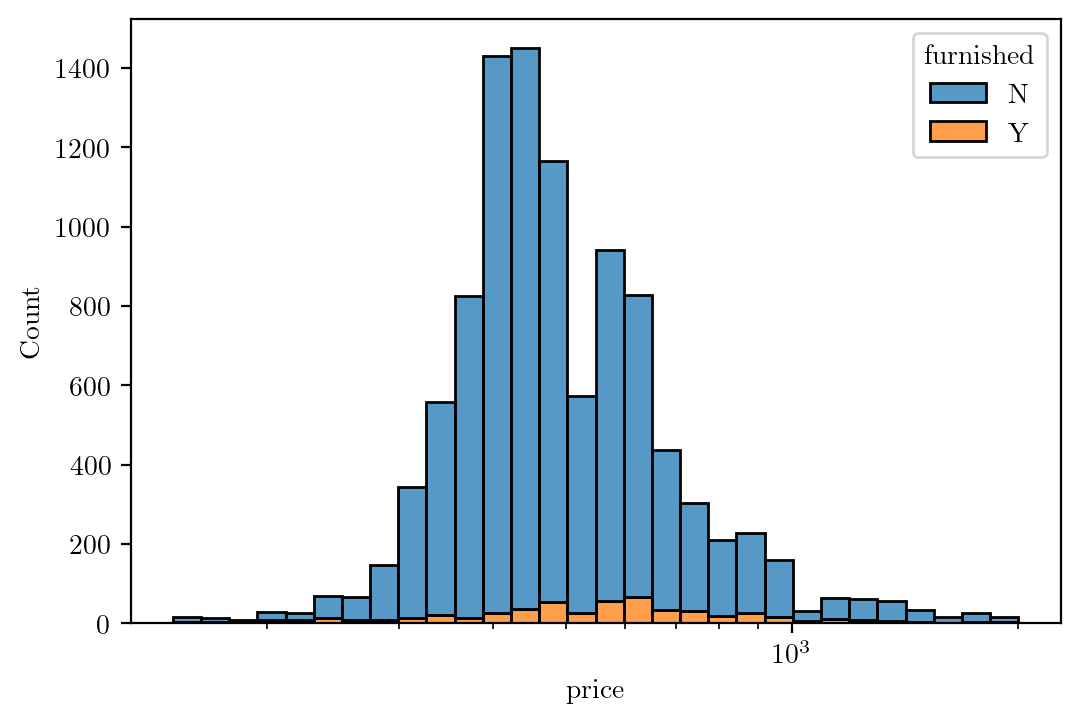

In [129]:
sns.histplot(data=df, x='price', hue='furnished', multiple='stack',
             bins=30, log_scale=True)

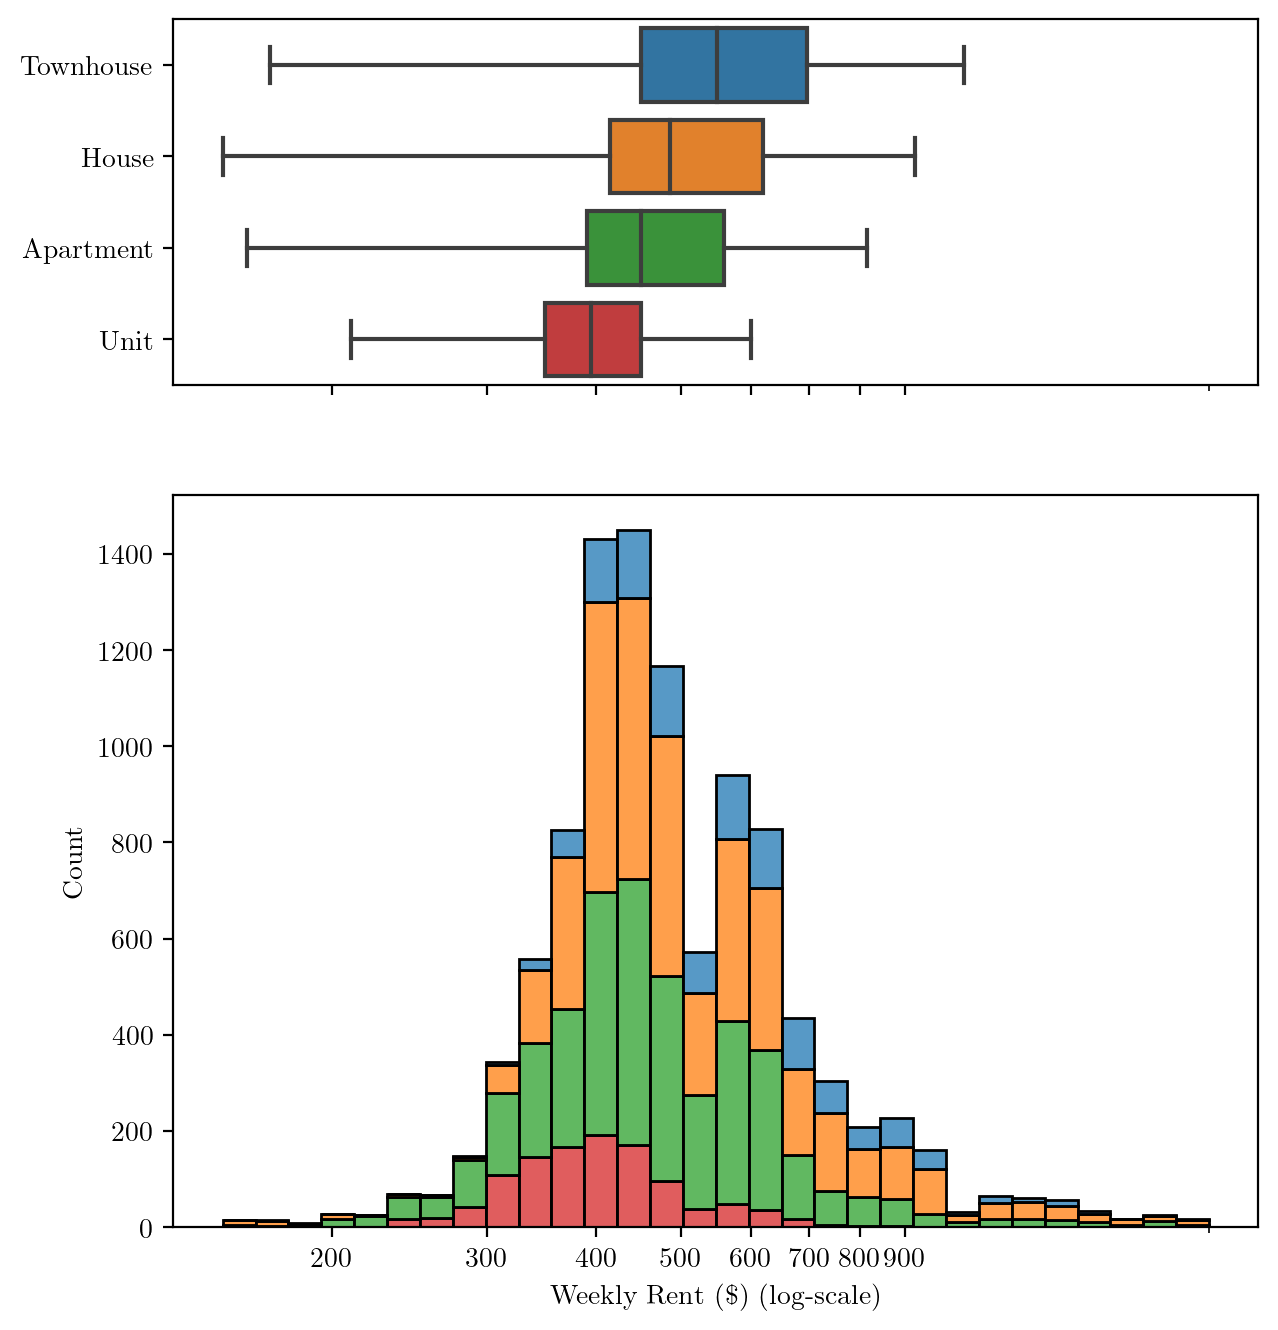

In [130]:
f, ((ax2, ax4)) = plt.subplots(2, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

sns.histplot(data=df, x='price', hue='propertyType', multiple='stack', hue_order=selected_property_types,
             bins=30, log_scale=True, ax=ax4, legend=False)

ax4.set_xlabel(r'Weekly Rent (\$) (log-scale)')
ax4.set_xticks([200, 300, 400, 500, 600, 700, 800, 900], labels=['200', '300', '400', '500', '600', '700', '800', '900'])

sns.boxplot(data=df, x='price', y='propertyType', showfliers=False, order=selected_property_types, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

f.savefig('../plots/property-type-boxplot-distplot')

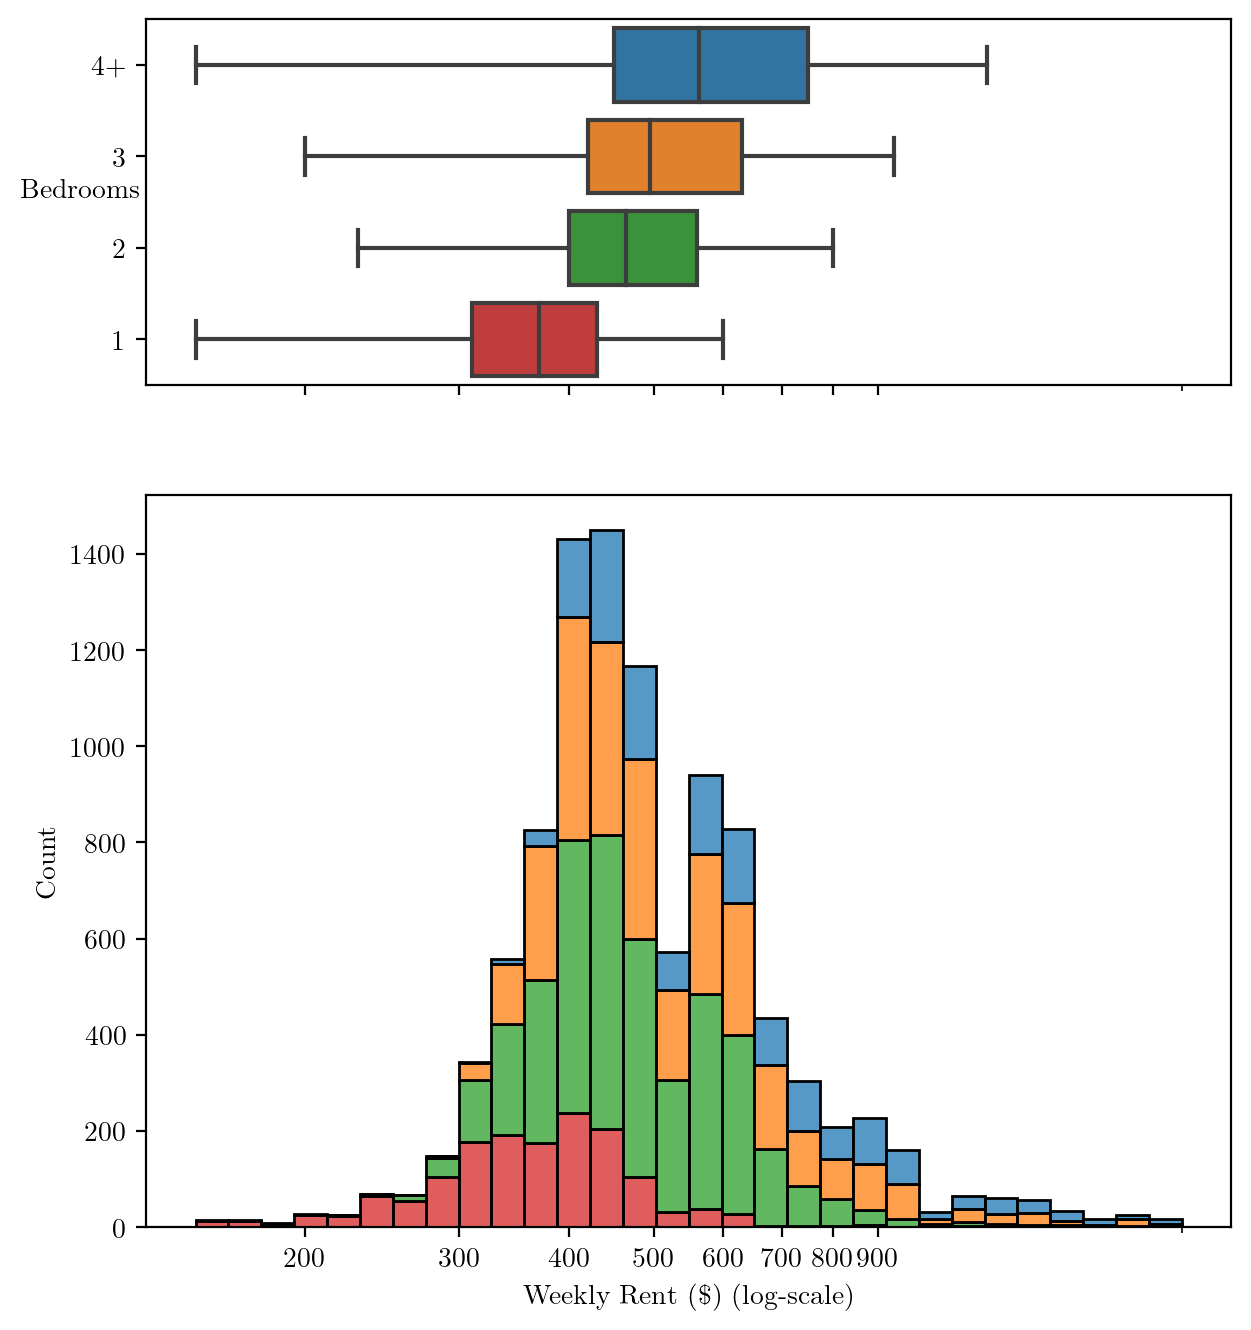

In [131]:
f, ((ax2, ax4)) = plt.subplots(2, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

bedroom_order = ['1', '2', '3', '4+'][::-1]

sns.histplot(data=df, x='price', hue='bedrooms', multiple='stack', hue_order=bedroom_order,
             bins=30, log_scale=True, ax=ax4, legend=False)

ax4.set_xlabel(r'Weekly Rent (\$) (log-scale)')
ax4.set_xticks([200, 300, 400, 500, 600, 700, 800, 900], labels=['200', '300', '400', '500', '600', '700', '800', '900'])

sns.boxplot(data=df, x='price', y='bedrooms', showfliers=False, order=bedroom_order, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Bedrooms', rotation=0)

f.savefig('../plots/bedrooms-boxplot-distplot')

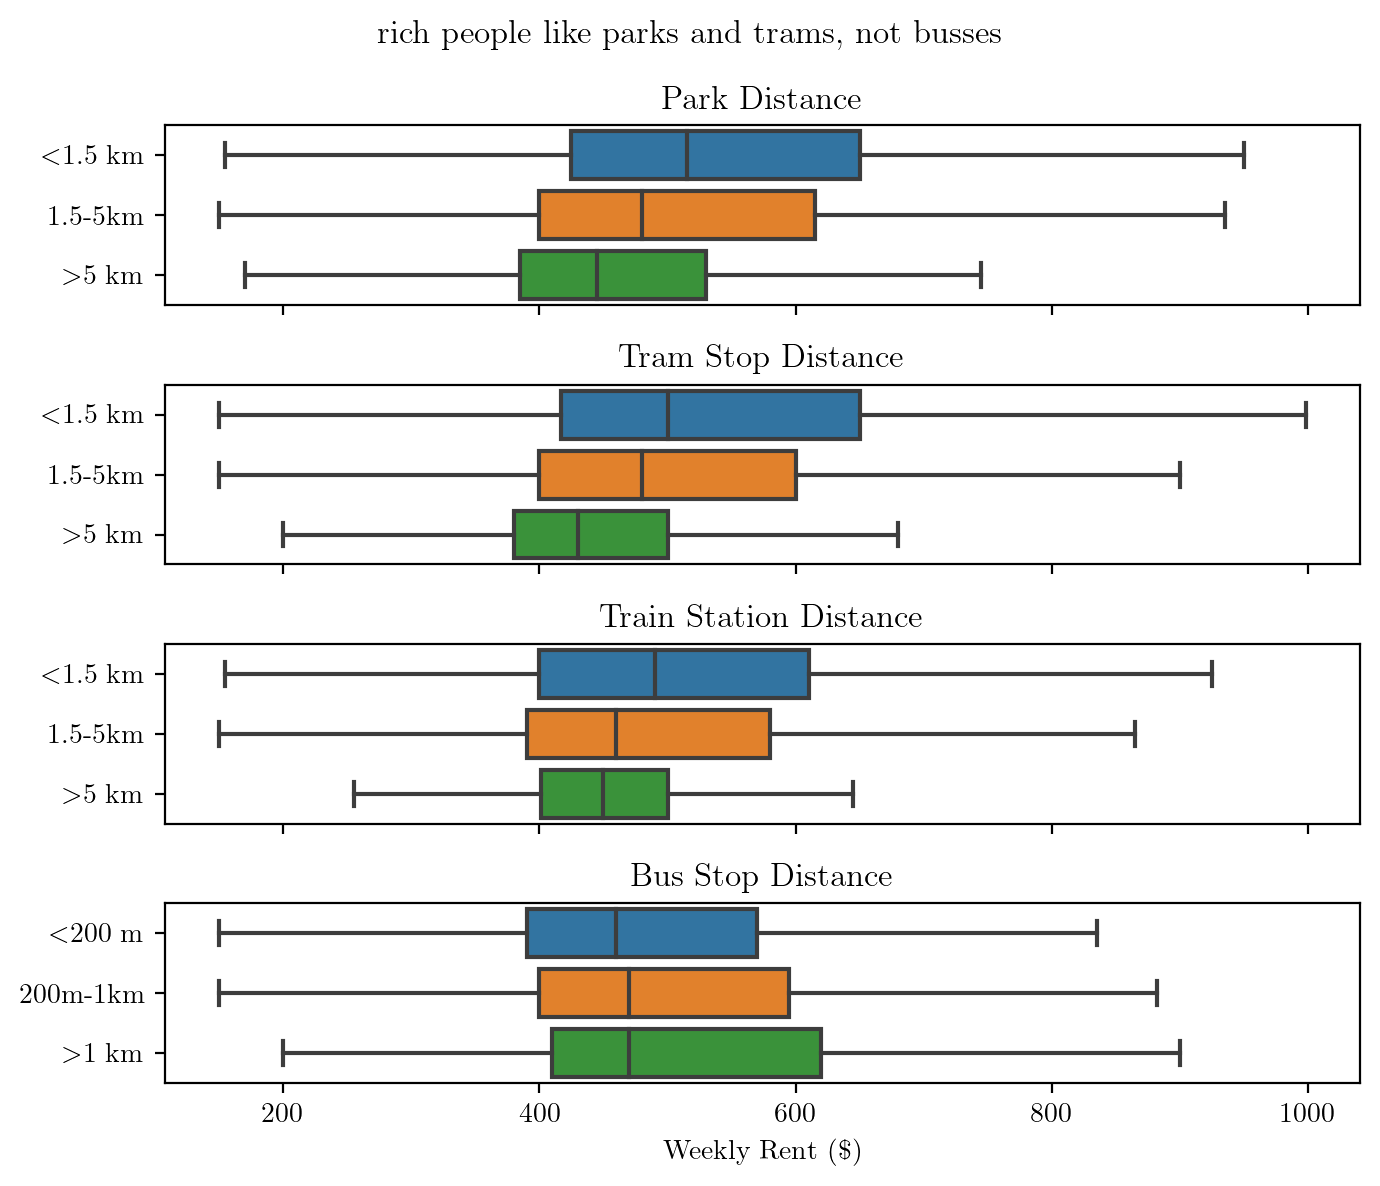

In [132]:
f, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, figsize=(7, 6), sharex=True)

sns.boxplot(data=df, x='price', y='park_walkability', showfliers=False, ax=ax1)
sns.boxplot(data=df, x='price', y='is_tram_stop_walkable', showfliers=False, ax=ax2)
sns.boxplot(data=df, x='price', y='is_train_station_walkable', showfliers=False, ax=ax3)
sns.boxplot(data=df, x='price', y='is_bus_walkable', showfliers=False, ax=ax4)

ax1.set_title('Park Distance')
ax2.set_title('Tram Stop Distance')
ax3.set_title('Train Station Distance')
ax4.set_title('Bus Stop Distance')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('')
    ax.set_ylabel('')

ax4.set_xlabel(r'Weekly Rent (\$)')

f.suptitle('rich people like parks and trams, not busses')

plt.tight_layout()
plt.savefig('../plots/rent-by-walkability.png')

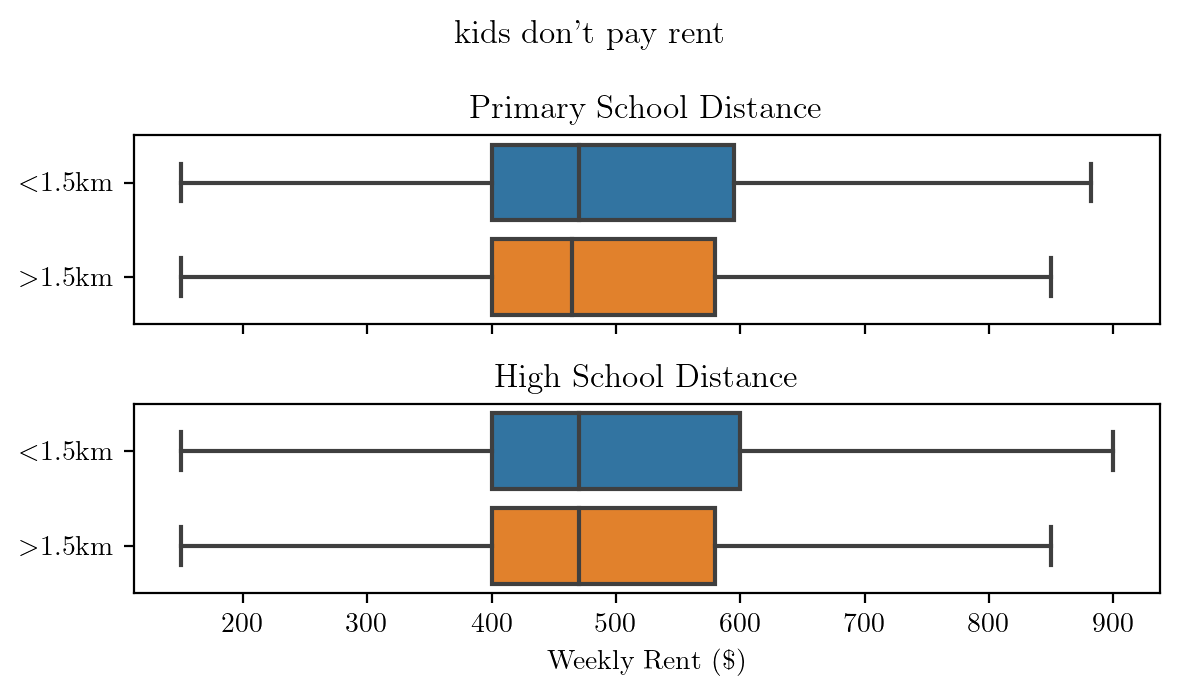

In [133]:
f, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(6, 3.5), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

yorder = df['is_primary_school_walkable'].unique()

sns.boxplot(data=df, x='price', y='is_primary_school_walkable', order=yorder, showfliers=False, ax=ax1)
sns.boxplot(data=df, x='price', y='is_secondary_school_walkable', order=yorder, showfliers=False, ax=ax2)

ax1.set_title('Primary School Distance')
ax2.set_title('High School Distance')

for ax in [ax1, ax2]:
    ax.set_xlabel('')
    ax.set_ylabel('')

ax2.set_xlabel(r'Weekly Rent (\$)')

f.suptitle('kids don\'t pay rent')

plt.tight_layout()

plt.savefig('../plots/rent-by-school-walkability.png')

In [134]:
df.columns

Index(['suburb', 'postcode', 'price', 'propertyType', 'bedrooms', 'bathrooms',
       'parkingSpaces', 'studies', 'furnished', 'closest_primary_distance',
       'closest_secondary_distance', 'closest_train_distance',
       'closest_tram_distance', 'cbd_distance', 'cbd_duration',
       'zlogCrimerate', 'closest_bus_distance', 'closest_park_distance',
       'min_pri_icsea', 'min_sec_icsea', 'log_closest_park_distance',
       'log_closest_tram_distance', 'log_closest_train_distance',
       'park_walkability', 'is_primary_school_walkable',
       'is_secondary_school_walkable', 'is_tram_stop_walkable',
       'is_train_station_walkable', 'is_bus_walkable', 'city'],
      dtype='object')

In [135]:
len(df)

10129

In [136]:
df['price'].mean()

522.9514265969

In [162]:
df.columns

Index(['suburb', 'postcode', 'price', 'propertyType', 'bedrooms', 'bathrooms',
       'parkingSpaces', 'studies', 'furnished', 'closest_primary_distance',
       'closest_secondary_distance', 'closest_train_distance',
       'closest_tram_distance', 'cbd_distance', 'cbd_duration',
       'zlogCrimerate', 'closest_bus_distance', 'closest_park_distance',
       'min_pri_icsea', 'min_sec_icsea', 'log_closest_park_distance',
       'log_closest_tram_distance', 'log_closest_train_distance',
       'park_walkability', 'is_primary_school_walkable',
       'is_secondary_school_walkable', 'is_tram_stop_walkable',
       'is_train_station_walkable', 'is_bus_walkable', 'city', 'city_suburb'],
      dtype='object')

Text(0, 0.5, 'Weekly Rent (log(\\$))')

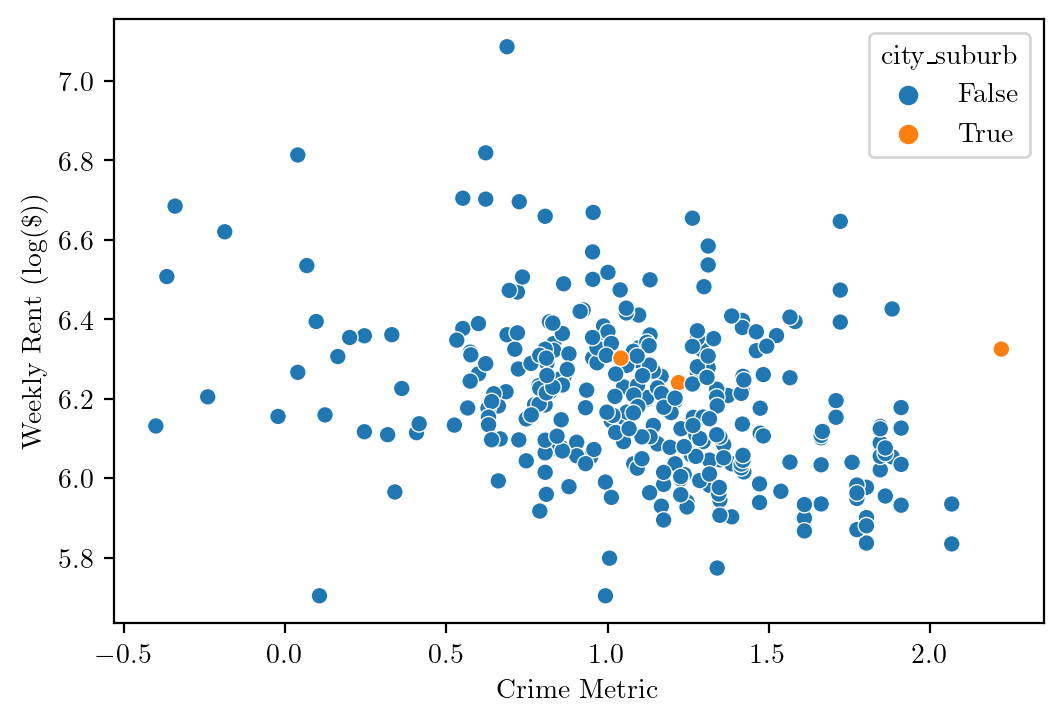

In [175]:

df2 = df.dropna(subset='zlogCrimerate')
df2['logRent'] = log(df2['price'])
df2['loglogRent'] = log(log(df2['price']))

df2 = df2.groupby(by=['suburb']).mean()

df2['city_suburb'] = df2['cbd_distance'].apply(lambda s: s < 2000)


sns.scatterplot(data=df2, x='zlogCrimerate', y='logRent', hue='city_suburb')
plt.xlabel('Crime Metric')
plt.ylabel(r'Weekly Rent (log(\$))')

Text(0, 0.5, 'Weekly Rent (log(\\$))')

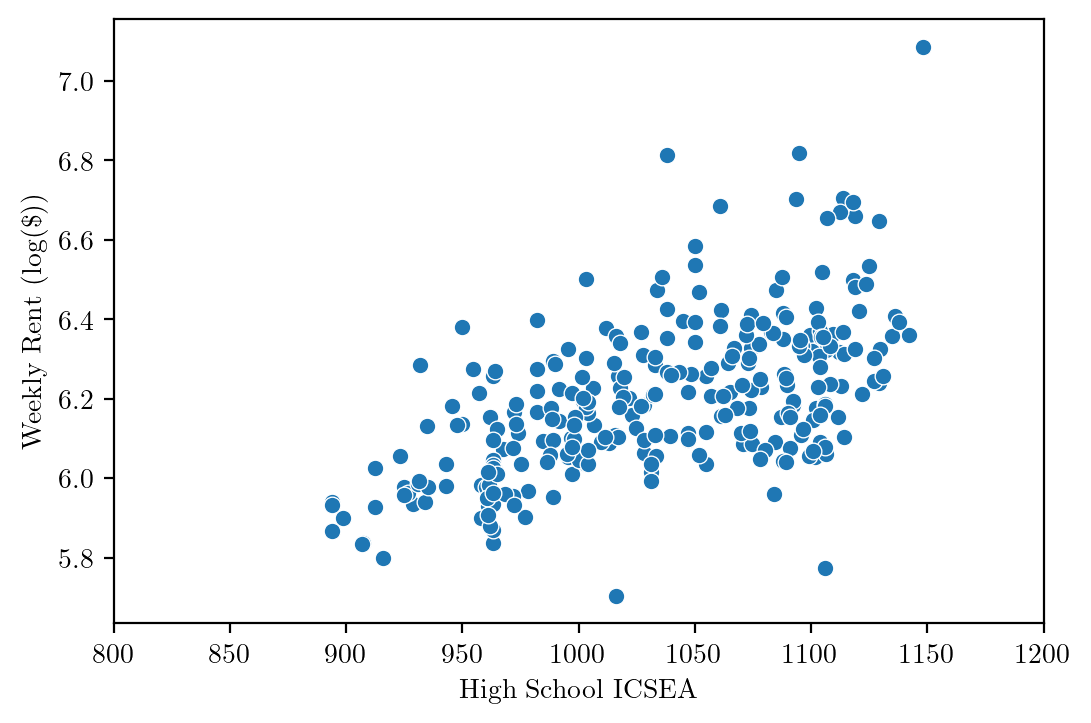

In [166]:
sns.scatterplot(data=df2, x='min_sec_icsea', y='logRent')
plt.xlim(800, 1200)
plt.xlabel('High School ICSEA')
plt.ylabel(r'Weekly Rent (log(\$))')